In [1]:
import operator
from typing import Annotated, Any, Sequence
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END


In [2]:
class State(TypedDict):
    aggregate: Annotated[list, operator.add]

In [3]:
from typing import Any


class ReturnNodeValue:
    def __init__(self, msg: str) -> None:
        self._value = msg

    def __call__(self, state: State) -> Any:
        print(f" I am going to save {self._value} to {state['aggregate']}")
        return {"aggregate": [self._value]}

In [ ]:
# Flow 1

In [4]:
builder = StateGraph(State)

In [5]:
a = ReturnNodeValue("I am A")
b = ReturnNodeValue("I am B")
c = ReturnNodeValue("I am C")
d = ReturnNodeValue("I am D")


In [6]:
builder.add_node("a", a)
builder.add_node("b", b)
builder.add_node("c", c)
builder.add_node("d", d)

In [7]:
builder.add_edge(START, "a")
builder.add_edge("a","b")
builder.add_edge("a", "c")
builder.add_edge("b","d")
builder.add_edge("c","d")
builder.add_edge("d", END)

In [8]:
graph = builder.compile()

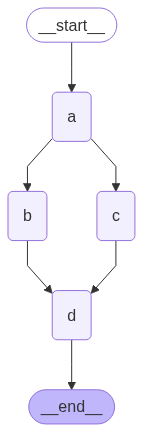

In [9]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [10]:
graph.invoke({"aggregate": []})

 I am going to save I am A to []
 I am going to save I am B to ['I am A']
 I am going to save I am C to ['I am A']
 I am going to save I am D to ['I am A', 'I am B', 'I am C']


{'aggregate': ['I am A', 'I am B', 'I am C', 'I am D']}

In [11]:
# Flow 2

In [12]:

builder = StateGraph(State)


In [13]:
a = ReturnNodeValue("I am A")
b = ReturnNodeValue("I am B")
b2 = ReturnNodeValue("I am B2")
c = ReturnNodeValue("I am C")
d = ReturnNodeValue("I am D")

In [14]:
builder.add_node("a", a)
builder.add_node("b", b)
builder.add_node("c", c)
builder.add_node("d", d)
builder.add_node("b2",b2)

In [15]:
builder.add_edge(START, "a")
builder.add_edge("a","b")
builder.add_edge("a", "c")
builder.add_edge("b","b2")
builder.add_edge("b2", "d")
builder.add_edge("c","d")
builder.add_edge("d", END)


In [16]:
graph = builder.compile()

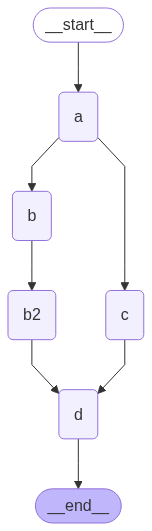

In [17]:

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [18]:
graph.invoke({"aggregate": []})

 I am going to save I am A to []
 I am going to save I am B to ['I am A']
 I am going to save I am C to ['I am A']
 I am going to save I am B2 to ['I am A', 'I am B', 'I am C']
 I am going to save I am D to ['I am A', 'I am B', 'I am C']
 I am going to save I am D to ['I am A', 'I am B', 'I am C', 'I am B2', 'I am D']


{'aggregate': ['I am A', 'I am B', 'I am C', 'I am B2', 'I am D', 'I am D']}